In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Pandas series
We can create a panda series using **pd.Series**. </br>
pd.Series is very much like a dictionary that we can use an `index` to find the corresponding value (In dictionary, we use `keys`).

In [16]:
ser = pd.Series([105,306,3560,1200,50],
                index = ['tom','bob','nancy','dan','eric'])
ser

tom       105
bob       306
nancy    3560
dan      1200
eric       50
dtype: int64

## 1.1. Indexing and select for pd.Series

### 1.1.1. Select single item
We can select using index! </br>The syntax would be `ser.loc[Index]`

In [14]:
ser.loc['tom']

100

We can also select based on their relative location. </br>
For example, we want to select the third item from the Series! </br>
The syntax is `ser.iloc[Number]`

In [18]:
ser.iloc[2]

3560

### 1.1.2. select multiple items!
Of course, we can select multiple items! </br>
The syntax is `ser.loc[<list of index>]`

In [19]:
ser.loc[['tom','nancy']]

tom       105
nancy    3560
dtype: int64

#### Practice #1: What if we want to select the 1st, 3rd, and 4th items from the Series?

In [39]:
# TODO: INSERT YOUR CODE HERE

# 2. Pandas DataFrame
## 2.1. create dataframe
### 2.1.2 create dataframe using pandas series
We can create pandas dataframe using pandas series.

In [23]:
ser1 = pd.Series(['red','blue','orange','pink','green'],
                 index = ['tom','bob','nancy','dan','eric'])

df = pd.DataFrame({'Fav_number':ser,
                   'Fav_color':ser1})

In [24]:
df

,Fav_number,Fav_color
tom,105,red
bob,306,blue
nancy,3560,orange
dan,1200,pink
eric,50,green


### 2.1.2 Create dataframe using numpy array
We can also create pandas dataframe using numpy 2d array! </br>
Following is an example!

Tom, Bob, and Nancy took three guesses for a number between 1 and 100. 

In [49]:
array_2d = np.random.randint(low=1, high=100, size=(3,3))

df_guess = pd.DataFrame(array_2d,index=['tom','bob','nancy'],
                             columns=['guess 1', 'guess 2', 'guess 3'])

In [50]:
df_guess

,guess 1,guess 2,guess 3
tom,85,94,29
bob,87,62,24
nancy,41,43,23


## 2.2. Index and select for pd.DataFrame

### 2.2.1. select single items
For example, what if I want to know Tom's first guess?

In [51]:
df_guess.loc['tom','guess 1']

85

Since we know Tom was the first in the ranking, we can also use `iloc`

In [52]:
df_guess.iloc[0,0]

85

### 2.2.2. select multiple items

For example, if we want to know Tom's first two guess?

In [53]:
df_guess.loc['tom',['guess 1','guess 2']]

guess 1    85
guess 2    94
Name: tom, dtype: int64

#### If we want to know the first guess of Tom and Bob?

In [54]:
df_guess.loc[['tom','bob'],'guess 1']

tom    85
bob    87
Name: guess 1, dtype: int64

#### Practice! What if we want to know Tom and Nancy's third guess using `iloc`? 

In [44]:
# TODO: INSERT YOUR CODE HERE

### 2.3. Simple calculations!
#### What's the largest guess from Tom, Bob and Nancy?

In [55]:
df_guess.max(axis=1)

tom      94
bob      87
nancy    43
dtype: int64

#### Practice #3: what if we want to know the smallest guess for Tom, Bob, and Nancy?

In [46]:
# TODO: INSERT YOUR CODE HERE

#### Which player has the biggest difference among their three guess?

In [56]:
# Step 1: calculate the difference between their 
# largest guess and their smallest guess
df_guess['guess diff'] = df_guess.max(axis=1) - df_guess.min(axis=1)

In [57]:
df_guess

,guess 1,guess 2,guess 3,guess diff
tom,85,94,29,65
bob,87,62,24,63
nancy,41,43,23,20


#### we can reorder the rows based on certain numbers!

In [63]:
# Step 2: reorder the rows based on `guess diff`
df_guess_reorder = df_guess.sort_values('guess diff',  # based on the values in this column
                                        axis=0,        # we would like to sort rows 
                                        ascending=False) # we want it in descending order


In [62]:
df_guess_reorder

,guess 1,guess 2,guess 3,guess diff
tom,85,94,29,65
bob,87,62,24,63
nancy,41,43,23,20


## 2.4. read external dataset

We usually use `pd.read_csv` to read in data in csv files, usually it is time series dataset. </br>

We can of course read in Excel dataset using `pd.read_excel`, which is not part of this exercise.

In [67]:
# the parse_dates=True command interprets the date string into date objects
# then we can start doing manipulations for the time series.
df_usgs = pd.read_csv('flow_cfs.USGS_04216000.Niagara_river.csv',
                      index_col=0,parse_dates=True)

### 2.4.1. Quickly plot the time series!

<AxesSubplot: xlabel='date'>

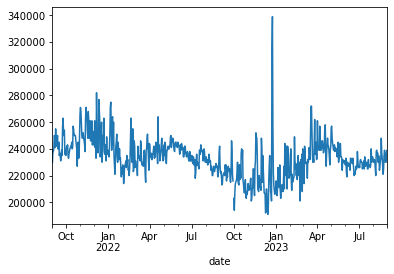

In [68]:
df_usgs['streamflow'].plot()

### 2.4.2. Data selection for time series

#### Select individual day

In [69]:
df_usgs.loc["2022-12-31"]

streamflow      211000.0
quality_flag           A
Name: 2022-12-31 00:00:00, dtype: object

#### Select a period of time with start and end dates

In [70]:
df_usgs.loc[slice("2022-10-01","2023-01-01")]

,streamflow,quality_flag
date,,
2022-10-01,203000.0,A
2022-10-02,194000.0,A
2022-10-03,206000.0,A
2022-10-04,213000.0,A
2022-10-05,215000.0,A
...,...,...
2022-12-28,209000.0,A
2022-12-29,206000.0,A
2022-12-30,207000.0,A


#### Select a period of time (from the 100th to 200th days)

In [76]:
df_usgs.iloc[slice(100,200)]

,streamflow,quality_flag
date,,
2021-12-10,240000.0,A
2021-12-11,277000.0,A
2021-12-12,269000.0,A
2021-12-13,261000.0,A
2021-12-14,234000.0,A
...,...,...
2022-03-15,228000.0,A
2022-03-16,228000.0,A
2022-03-17,230000.0,A


### 2.4.3. what if we want to find what day Niagara River have the highest flow?

In [80]:
df_usgs.sort_values('streamflow',axis=0)

,streamflow,quality_flag
date,,
2022-12-14,191000.0,A
2022-12-09,192000.0,A
2022-12-10,193000.0,A
2022-10-02,194000.0,A
2022-12-15,196000.0,A
...,...,...
2021-12-11,277000.0,A
2021-12-06,282000.0,A
2022-12-23,314000.0,A


### 2.4.4. How can we get the monthly averaged flow? `df.resample`
'MS' denotes the start of the month, it collects all data points within that month

In [107]:
df_usgs_monthly = df_usgs[['streamflow']].resample('MS').mean()

<AxesSubplot: xlabel='date'>

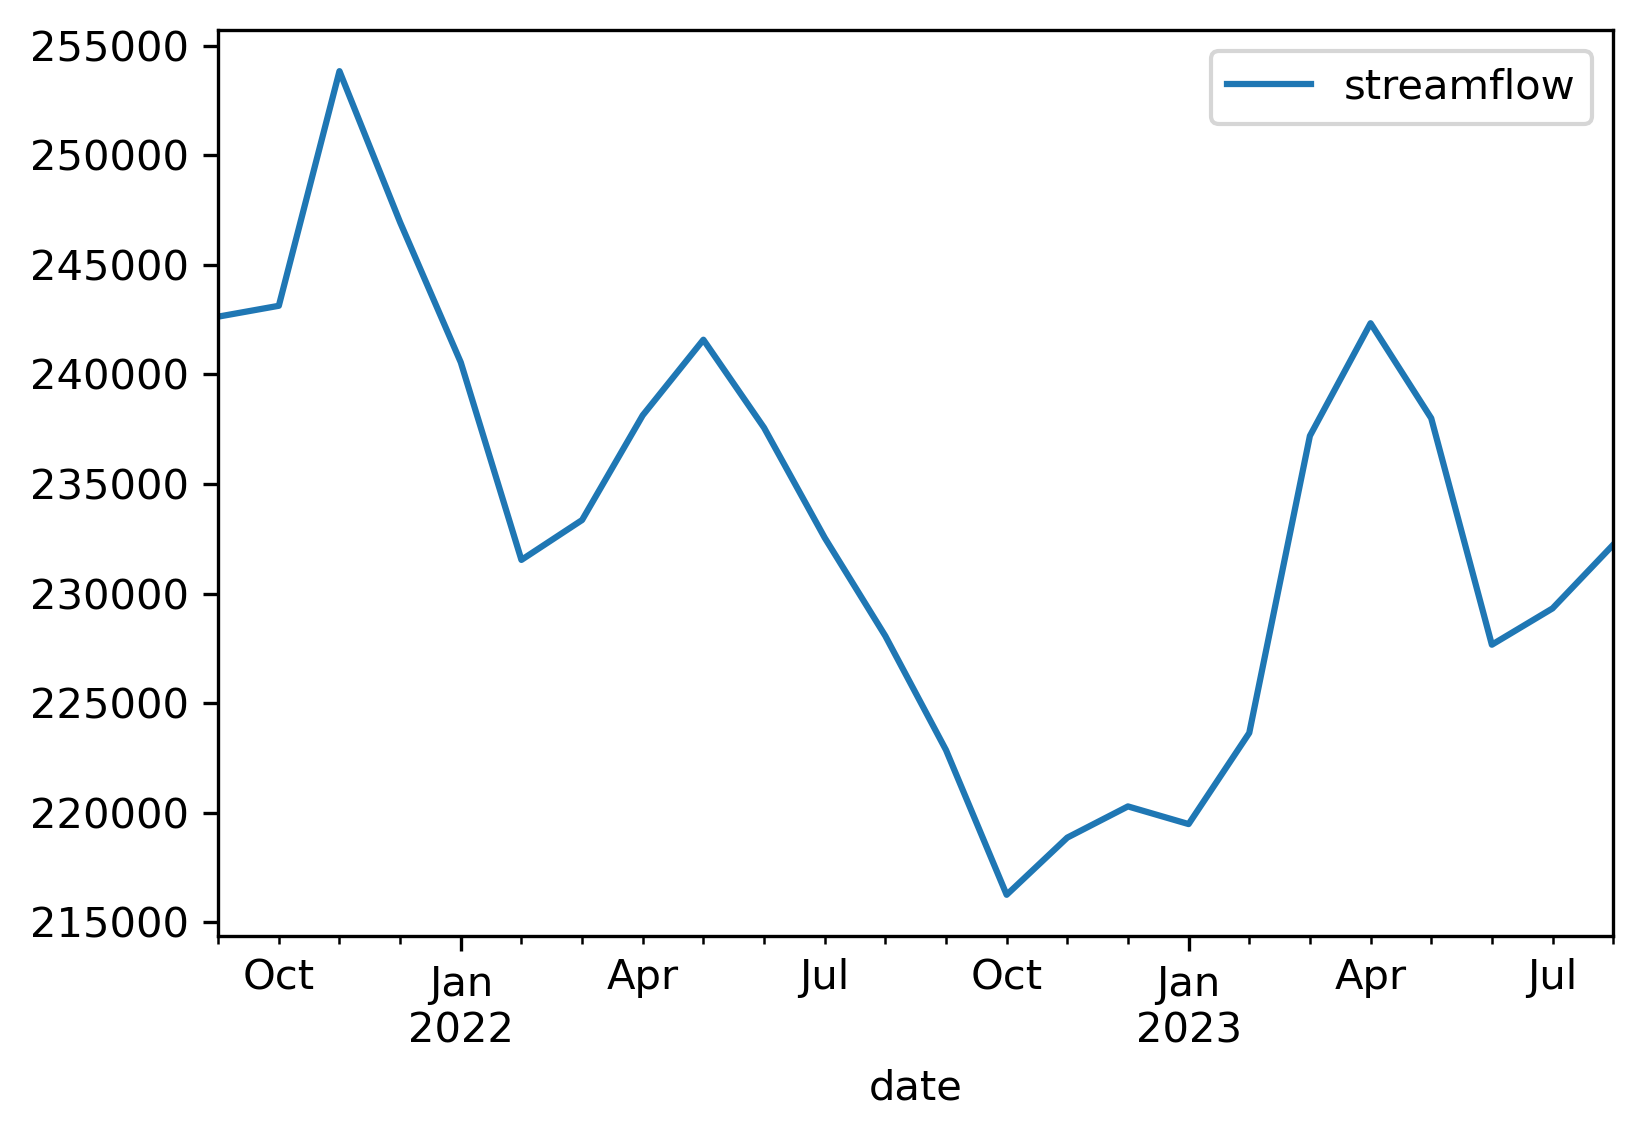

In [108]:
fig,ax=plt.subplots(1,1,dpi=300)
df_usgs_monthly.plot(ax=ax)


### 2.3.5. How can we get the mean monthly flow across the two years? `df.groupby`

In [113]:
df_usgs_mean_monthly = df_usgs_monthly.groupby(df_usgs_monthly.index.month).mean()

<AxesSubplot: xlabel='date'>

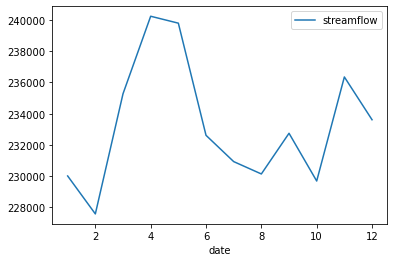

In [115]:
df_usgs_mean_monthly.plot()